In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def initialize_population(num_individuals, num_variables):
    return np.random.randint(2, size=(num_individuals, num_variables))

In [3]:
def onemax(ind):
    return np.sum(ind)

In [4]:
def leadingone(ind):
    for i in range(len(ind)):
        if ind[i] == 0:
            return i
    return len(ind)

In [5]:
def trap5(ind):
    k = 5
    if np.sum(ind) == k:
        return k
    return k - np.sum(ind)

def concatenated_trap5(ind):
    sum = 0
    for idx in range(0, len(ind), 5):
        sum += trap5(ind[idx:idx+5])
    return sum

In [6]:
def crossover(pop):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring1[j]
                offspring1[j] = offspring2[j]
                offspring2[j] = temp
                
        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [7]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    selected = [pop[i] for i in selected_indices]
    
    return selected

def tournament_selection(pop, pop_fitness, selection_size):
    tournament_size = 4
    selected = []
    remaining = list(range(len(pop)))

    while len(selected) < selection_size:
        if len(remaining) < tournament_size:
            T = remaining
        else:
            T = np.random.choice(remaining, tournament_size, replace=False).tolist()
        winner = max(T, key=lambda i: pop_fitness[i])
        selected.append(pop[winner])
        # remaining.remove(winner)

    return selected
    
def proportional_selection(pop, pop_fitness, selection_size):
    fitness = sum(pop_fitness)
    selection_prob = [f/fitness for f in pop_fitness]
    # print("Selection",selection_prob)
    cumulative_prob = np.cumsum(selection_prob)
    # print("Cumulative",cumulative_prob)
    selected = []

    for _ in range(selection_size):
        r = np.random.rand()
        selected_index = np.searchsorted(cumulative_prob, r, side='right')
        selected.append(pop[selected_index])

    return selected


In [8]:
def genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, selection_method, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = [[num_evaluations, np.max(pop_fitness)]]
    i = 0
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    selection_size = num_individuals

    while num_evaluations < max_evaluations:
        i += 1
        offspring = crossover(pop)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)
        pop = np.vstack([pop, offspring])
        pop_fitness = np.hstack([pop_fitness, offspring_fitness])

        if selection_method == "tournament":
            pop = tournament_selection(pop, pop_fitness, selection_size)
        elif selection_method == "truncation":
            pop = truncation_selection(pop, pop_fitness, selection_size)
        elif selection_method == "proportional":
            pop = proportional_selection(pop, pop_fitness, selection_size)
        else:
            raise ValueError("Please select a valid selection method: tournament, truncation, or proportional")

        pop_fitness = np.array([objective(ind) for ind in pop])
        best_fitness.append([num_evaluations, np.max(pop_fitness)])

        if verbose:
            print(f'#Gen {i}:')
            print(pop_fitness)

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')  
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)


## Experiments

### OneMax

In [9]:
onemax_n_trials = 10
onemax_num_parameters = 100
onemax_max_evaluations = 100000
onemax_seeds = [22520278 + i for i in range(onemax_n_trials)]
onemax_num_individuals = 128
onemax_results = {"tournament": [], "truncation": [], "proportional": []}
onemax_evals = []

for onemax_selection_method in ["tournament", "truncation", "proportional"]:
    onemax_fits = []
    for onemax_seed in onemax_seeds:
        np.random.seed(onemax_seed)
        pop, pop_fitness, best_fitness = genetic_algorithm(
            onemax, onemax_num_individuals, onemax_num_parameters, onemax_max_evaluations, onemax_selection_method
        )
        best_fitness = np.array(best_fitness)
        
        if len(onemax_evals) == 0:
            onemax_evals = best_fitness[:, 0]
        onemax_fits.append(best_fitness[:, 1])
    
    onemax_results[onemax_selection_method] = np.array(onemax_fits)

onemax_avg_fitness = {key: np.mean(val, axis=0) for key, val in onemax_results.items()}
onemax_std_fitness = {key: np.std(val, axis=0) for key, val in onemax_results.items()}
onemax_colors = {"tournament": "r", "truncation": "b", "proportional": "g"}


In [10]:
print("onemax_avg_fitness", onemax_avg_fitness)

onemax_avg_fitness {'tournament': array([62.5, 64.1, 66.4, 70.3, 71.7, 75. , 77.5, 80.5, 82.8, 85.7, 87.3,
       89.4, 92.1, 93.1, 94.6, 95.9, 97.4, 97.9, 98.8, 99.5, 99.7, 99.7,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8

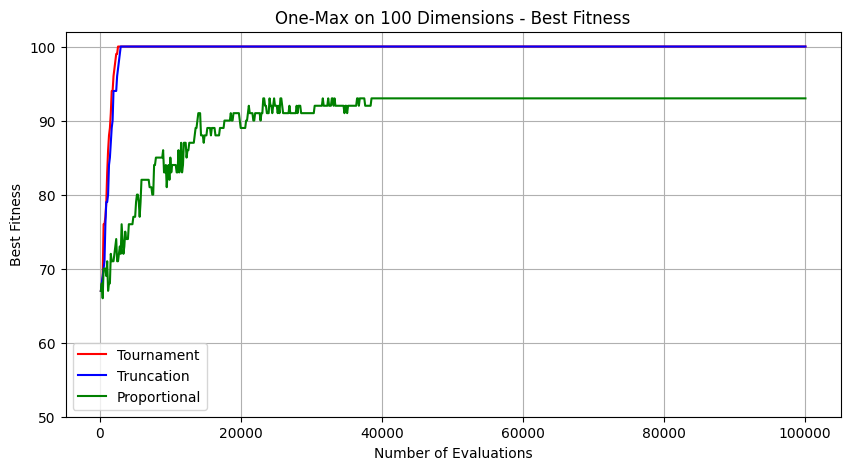

In [11]:
plt.figure(figsize=(10, 5))
for onemax_selection_method in onemax_results:
    onemax_best_fitness = np.max(onemax_results[onemax_selection_method], axis=0)
    plt.plot(onemax_evals, onemax_best_fitness, label=onemax_selection_method.capitalize(), color=onemax_colors[onemax_selection_method])

plt.xlabel("Number of Evaluations")
plt.ylabel("Best Fitness")
plt.ylim(onemax_num_parameters / 2, onemax_num_parameters + 2)
plt.title(f"One-Max on {onemax_num_parameters} Dimensions - Best Fitness")
plt.legend()
plt.grid()
plt.show()

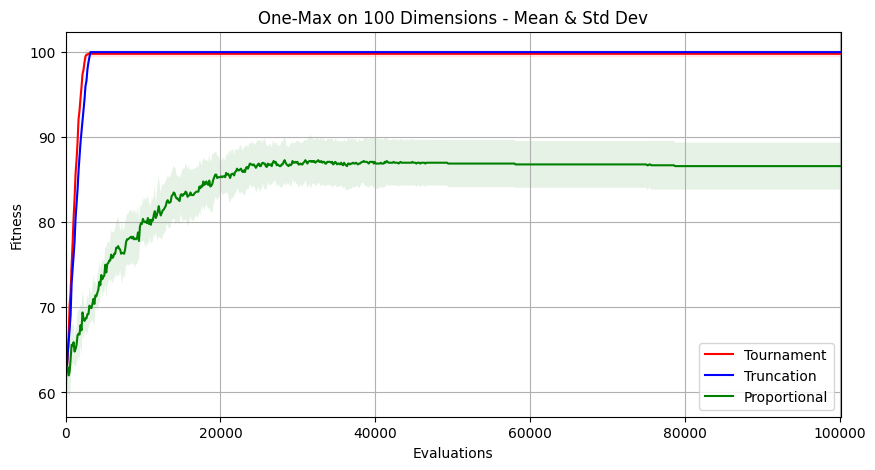

In [12]:
plt.figure(figsize=(10, 5))
for onemax_selection_method in onemax_results:
    onemax_avg = onemax_avg_fitness[onemax_selection_method]
    onemax_err = onemax_std_fitness[onemax_selection_method]
    plt.plot(onemax_evals, onemax_avg, label=onemax_selection_method.capitalize(), color=onemax_colors[onemax_selection_method])
    plt.fill_between(onemax_evals, onemax_avg + onemax_err, onemax_avg - onemax_err, facecolor=onemax_colors[onemax_selection_method], alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, onemax_max_evaluations + onemax_num_individuals)
plt.title(f"One-Max on {onemax_num_parameters} Dimensions - Mean & Std Dev")
plt.legend()
plt.grid()
plt.show()

### Leading one

In [13]:
leadingone_n_trials = 10
leadingone_num_parameters = 20
leadingone_max_evaluations = 100000
leadingone_seeds = [22520278 + i for i in range(leadingone_n_trials)]
leadingone_num_individuals = 128
leadingone_results = {"tournament": [], "truncation": [], "proportional": []}
leadingone_evals = []

for leadingone_selection_method in ["tournament", "truncation", "proportional"]:
    leadingone_fits = []
    for leadingone_seed in leadingone_seeds:
        np.random.seed(leadingone_seed)
        pop, pop_fitness, best_fitness = genetic_algorithm(
            leadingone, leadingone_num_individuals, leadingone_num_parameters, leadingone_max_evaluations, leadingone_selection_method
        )
        best_fitness = np.array(best_fitness)
        
        if len(leadingone_evals) == 0:
            leadingone_evals = best_fitness[:, 0]
        leadingone_fits.append(best_fitness[:, 1])
    
    leadingone_results[leadingone_selection_method] = np.array(leadingone_fits)

leadingone_avg_fitness = {key: np.mean(val, axis=0) for key, val in leadingone_results.items()}
leadingone_std_fitness = {key: np.std(val, axis=0) for key, val in leadingone_results.items()}
leadingone_colors = {"tournament": "r", "truncation": "b", "proportional": "g"}

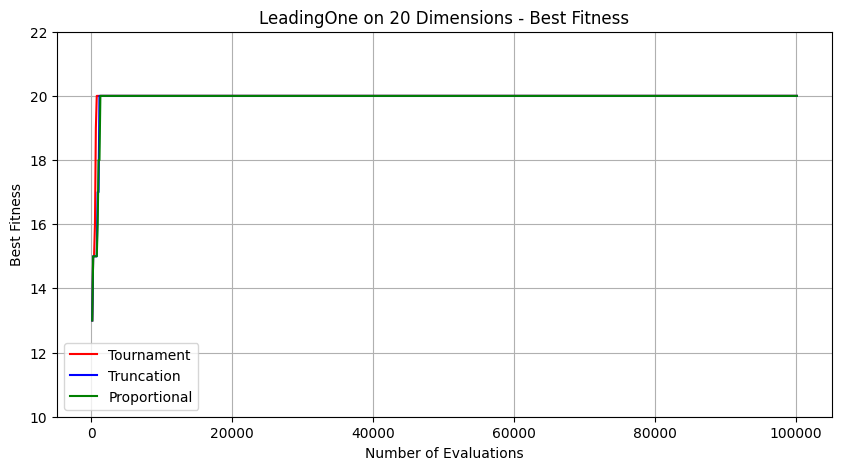

In [14]:
plt.figure(figsize=(10, 5))
for leadingone_selection_method in leadingone_results:
    leadingone_best_fitness = np.max(leadingone_results[leadingone_selection_method], axis=0)
    plt.plot(leadingone_evals, leadingone_best_fitness, label=leadingone_selection_method.capitalize(), color=leadingone_colors[leadingone_selection_method])

plt.xlabel("Number of Evaluations")
plt.ylabel("Best Fitness")
plt.ylim(leadingone_num_parameters / 2, leadingone_num_parameters + 2)
plt.title(f"LeadingOne on {leadingone_num_parameters} Dimensions - Best Fitness")
plt.legend()
plt.grid()
plt.show()

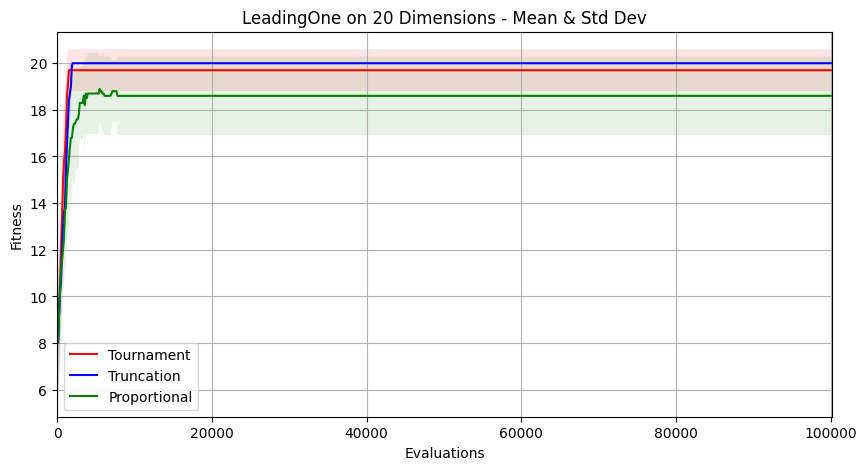

In [15]:
plt.figure(figsize=(10, 5))
for leadingone_selection_method in leadingone_results:
    leadingone_avg = leadingone_avg_fitness[leadingone_selection_method]
    leadingone_err = leadingone_std_fitness[leadingone_selection_method]
    plt.plot(leadingone_evals, leadingone_avg, label=leadingone_selection_method.capitalize(), color=leadingone_colors[leadingone_selection_method])
    plt.fill_between(leadingone_evals, leadingone_avg + leadingone_err, leadingone_avg - leadingone_err, facecolor=leadingone_colors[leadingone_selection_method], alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, leadingone_max_evaluations + leadingone_num_individuals)
plt.title(f"LeadingOne on {leadingone_num_parameters} Dimensions - Mean & Std Dev")
plt.legend()
plt.grid()
plt.show()

### Concatenated Trap-5

In [16]:
trap5_n_trials = 10
trap5_num_parameters = 25
trap5_max_evaluations = 100000
trap5_seeds = [22520278 + i for i in range(trap5_n_trials)]
trap5_num_individuals = 128
trap5_results = {"tournament": [], "truncation": [], "proportional": []}
trap5_evals = []

for trap5_selection_method in ["tournament", "truncation", "proportional"]:
    trap5_fits = []
    for trap5_seed in trap5_seeds:
        np.random.seed(trap5_seed)
        pop, pop_fitness, best_fitness = genetic_algorithm(
            concatenated_trap5, trap5_num_individuals, trap5_num_parameters, trap5_max_evaluations, trap5_selection_method
        )
        best_fitness = np.array(best_fitness)

        if len(trap5_evals) == 0:
            trap5_evals = best_fitness[:, 0]
        trap5_fits.append(best_fitness[:, 1])

    trap5_results[trap5_selection_method] = np.array(trap5_fits)

trap5_avg_fitness = {key: np.mean(val, axis=0) for key, val in trap5_results.items()}
trap5_std_fitness = {key: np.std(val, axis=0) for key, val in trap5_results.items()}
trap5_colors = {"tournament": "r", "truncation": "b", "proportional": "g"}

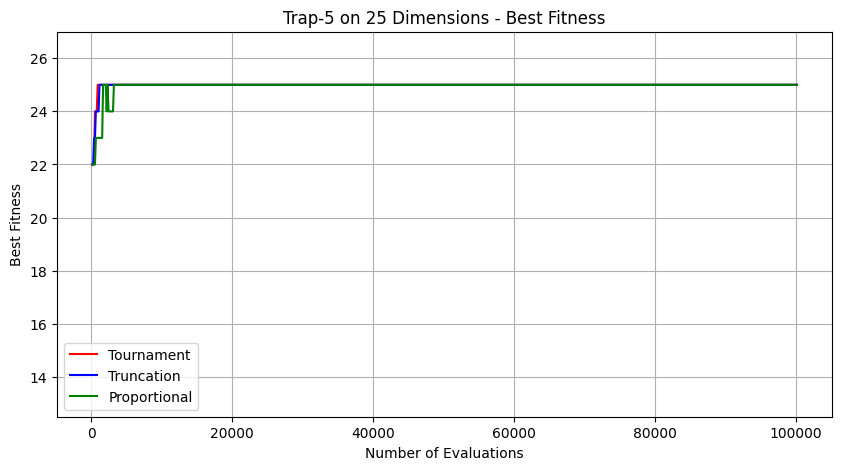

In [17]:
plt.figure(figsize=(10, 5))
for trap5_selection_method in trap5_results:
    trap5_best_fitness = np.max(trap5_results[trap5_selection_method], axis=0)
    plt.plot(trap5_evals, trap5_best_fitness, label=trap5_selection_method.capitalize(), color=trap5_colors[trap5_selection_method])

plt.xlabel("Number of Evaluations")
plt.ylabel("Best Fitness")
plt.ylim(trap5_num_parameters / 2, trap5_num_parameters + 2)
plt.title(f"Trap-5 on {trap5_num_parameters} Dimensions - Best Fitness")
plt.legend()
plt.grid()
plt.show()

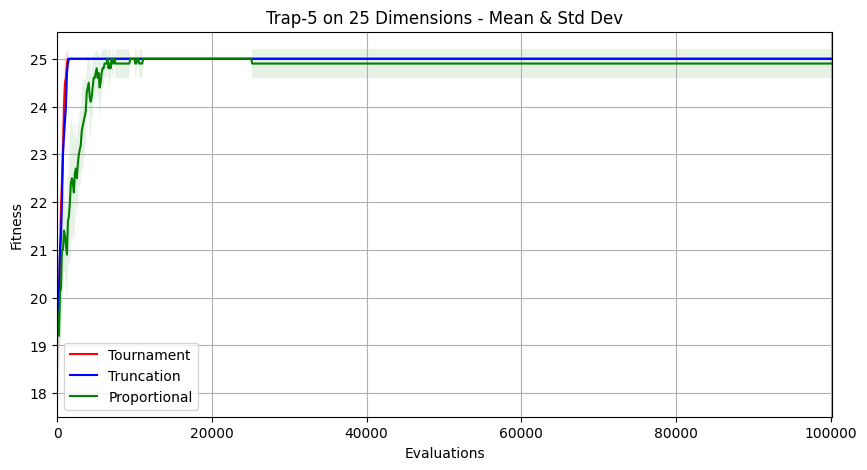

In [18]:
plt.figure(figsize=(10, 5))
for trap5_selection_method in trap5_results:
    trap5_avg = trap5_avg_fitness[trap5_selection_method]
    trap5_err = trap5_std_fitness[trap5_selection_method]
    plt.plot(trap5_evals, trap5_avg, label=trap5_selection_method.capitalize(), color=trap5_colors[trap5_selection_method])
    plt.fill_between(trap5_evals, trap5_avg + trap5_err, trap5_avg - trap5_err, facecolor=trap5_colors[trap5_selection_method], alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, trap5_max_evaluations + trap5_num_individuals)
plt.title(f"Trap-5 on {trap5_num_parameters} Dimensions - Mean & Std Dev")
plt.legend()
plt.grid()
plt.show()